<a href="https://colab.research.google.com/github/lukilearn/CAPTONE_4_Netflix_Movies_And_Tv_Shows_Clustering_Unsupervised_ML/blob/main/Netflix_Movies_And_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Movies And TV Shows Clustering**

---------------------------------------------

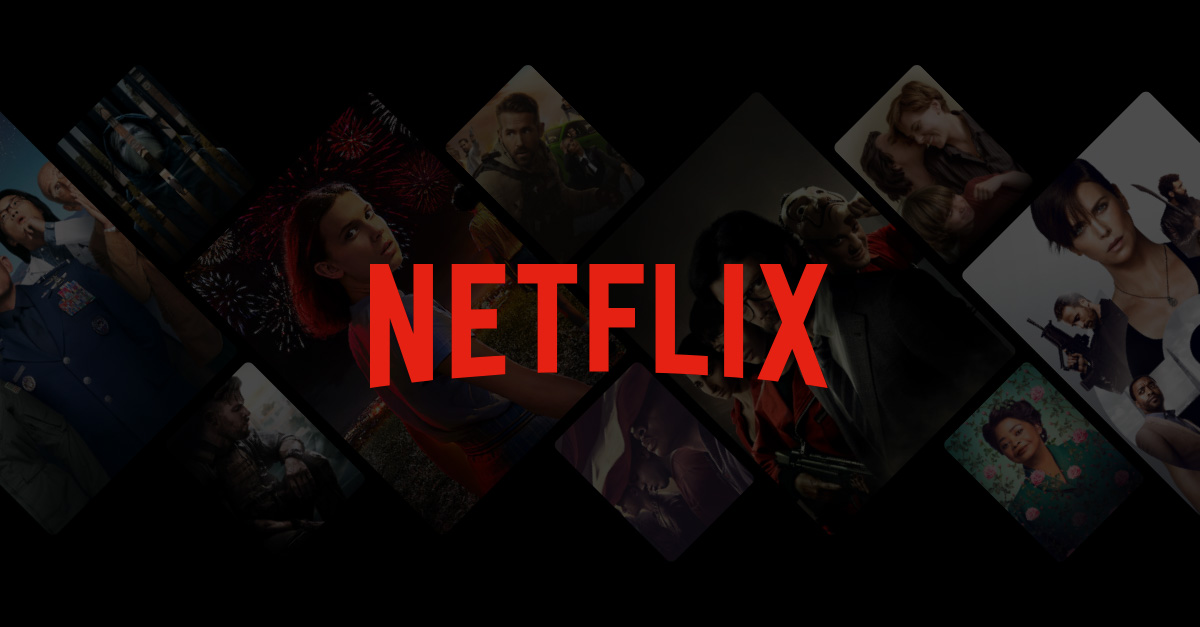

##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **NAME**              - G MOHAMED LUQMAN

# **Project Summary -**

Netflix is a subscription-based streaming service that allows our members to watch TV shows and movies on an internet-connected device. Depending on your plan, you can also download TV shows and movies to your iOS, Android, or Windows 10 device and watch without an internet connection.


Netflix Movies and TV Shows Clustering is a data analysis and machine learning technique that Netflix uses to group their content into similar categories. This technique involves analyzing the various characteristics of each title, such as genre, cast and plot, and using algorithms to identify patterns and similarities. In this way, Netflix can provide its users with personalized recommendations based on their viewing history and preferences. The goal is to improve user engagement and satisfaction, which will lead to increased retention and company revenue.

Netflix Movies and TV Shows Clustering is a data-driven approach that Netflix uses to group its vast library of content into similar categories. The process involves collecting and analyzing various data points such as genre, cast, director, plot and other relevant features. Netflix will then use unsupervised machine learning algorithms to identify patterns and similarities between different titles.

Algorithms used in this process include clustering techniques such as k-means, hierarchical clustering, and principal component analysis (PCA). These algorithms help Netflix group movies and TV shows with similar features into distinct groups, each representing a unique genre or category.

The ultimate goal of this clustering is to improve the user experience on Netflix by providing personalized content recommendations to users based on their viewing history and preferences. By organizing the content library into clusters, Netflix can suggest titles to users that are more likely to match their interests, making it more likely that users will stay engaged with the platform.

In addition to improving user satisfaction, clustering also helps Netflix make data-driven decisions about content production and licensing. By understanding underlying trends and patterns in user behavior, Netflix can make informed decisions about which titles to produce or acquire and which to remove from its platform. This ultimately helps increase customer retention and company revenue.

In this project we have done-:

* Understanding the dataset and problem statement.
* Data Wrangling.
* Handling null vaulues and Data Cleaning.
* Text Preprocessing.
* Text Vectorization using TF-TDF.
* Clustering Analysis using different clustering algorithms.
* Checking out distribution of different cluster with the help of word cloud.
* Building a recommender system using cosine similarity.
Conclusion

# **GitHub Link 👇🏻**

https://github.com/lukilearn/CAPTONE_4_Netflix_Movies_And_Tv_Shows_Clustering_Unsupervised_ML

# **Problem Statement👇🏻**



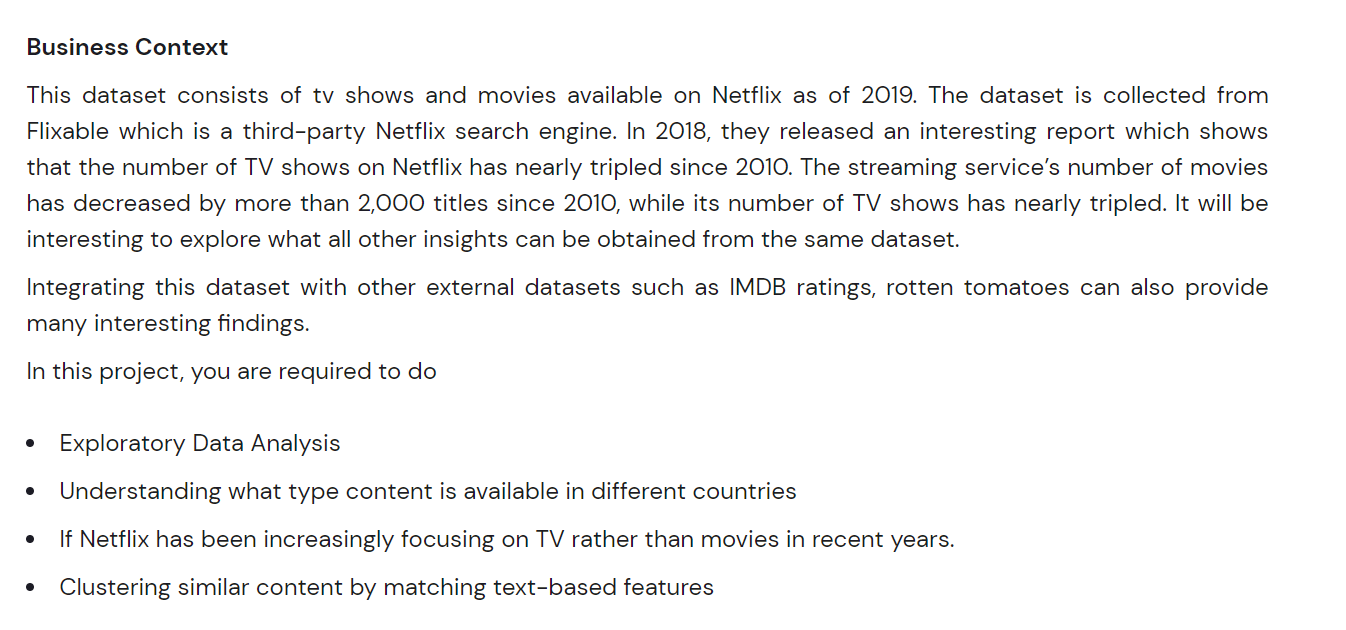

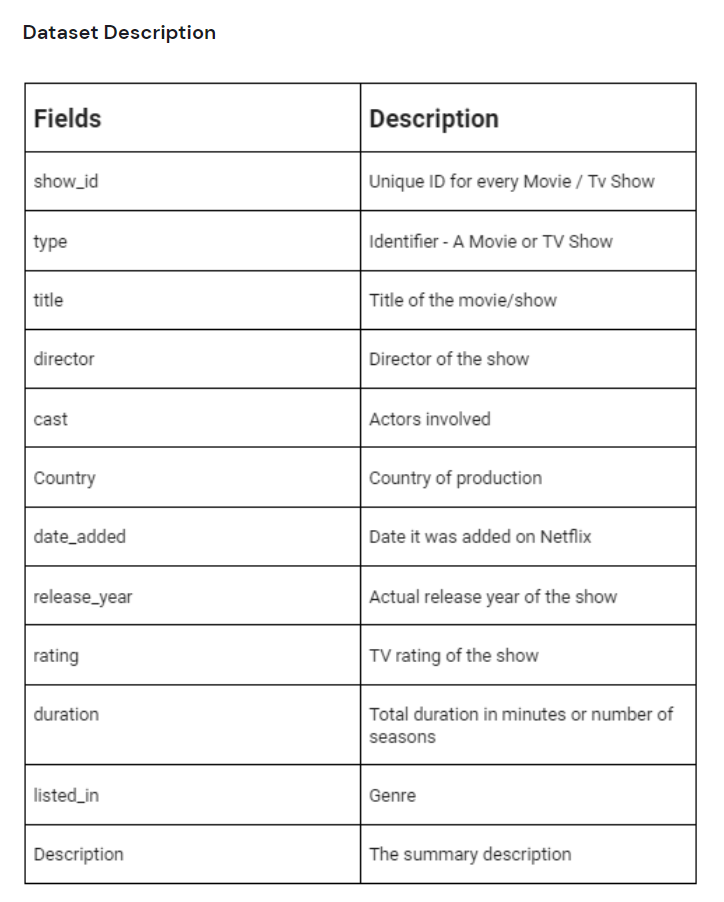

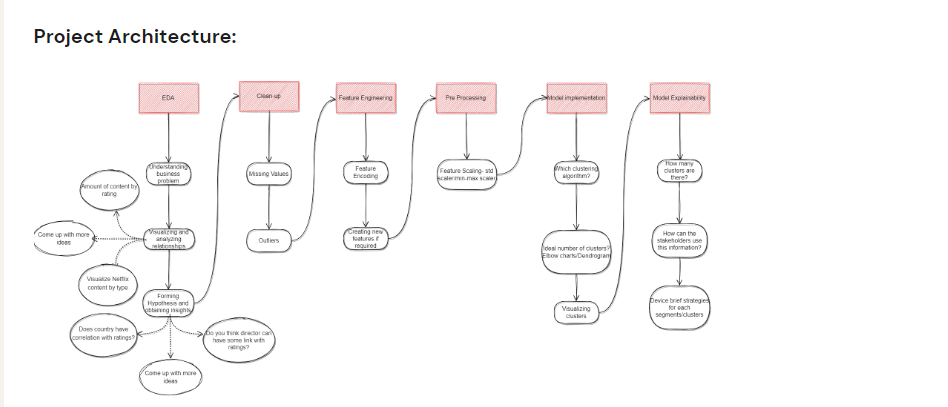

### Importing Necessary Libraries👇🏻

In [1]:

# Necessary Libraries
#necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


#for nlp
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch


import warnings
warnings.filterwarnings('ignore')



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the given dataset👇🏻

In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Almabetter_Capstone_Project/Netflix_Movies_And_TV_Shows_Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv',)

### Dataset First View👇🏻

In [4]:
# Dataset First Look
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count👇🏻

In [5]:

# Dataset Rows & Columns count

# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  7787
Number of columns are:  12


### Dataset Information👇🏻

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB



Duplicate Values, Missing Values/Null Values, Unique value


In [7]:


# Dataset Duplicate Value Count
# This user define function will give the type,count of null and non null values as well as null ratio

def df_info():
  temp=pd.DataFrame(index=data.columns)
  temp["datatype"]=data.dtypes
  temp["not null values"]=data.count()
  temp["null value"]=data.isnull().sum()
  temp["% of null value"]=data.isnull().mean()*100
  temp["unique count"]=data.nunique() # Return Series with number of distinct elements. Can ignore NaN values.
  return temp
df_info()



datatype  not null values  null value  % of null value  \
show_id        object             7787           0         0.000000   
type           object             7787           0         0.000000   
title          object             7787           0         0.000000   
director       object             5398        2389        30.679337   
cast           object             7069         718         9.220496   
country        object             7280         507         6.510851   
date_added     object             7777          10         0.128419   
release_year    int64             7787           0         0.000000   
rating         object             7780           7         0.089893   
duration       object             7787           0         0.000000   
listed_in      object             7787           0         0.000000   
description    object             7787           0         0.000000   

              unique count  
show_id               7787  
type                     2  
title                 7787  
director              4049  
cast                  6831  
country                681  
date_added            1565  
release_year            73  
rating                  14  
duration               216  
listed_in              492  
description           7769


Missing Values/Null Values


In [8]:
# Missing Values/Null Values Count
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<BarContainer object of 12 artists>

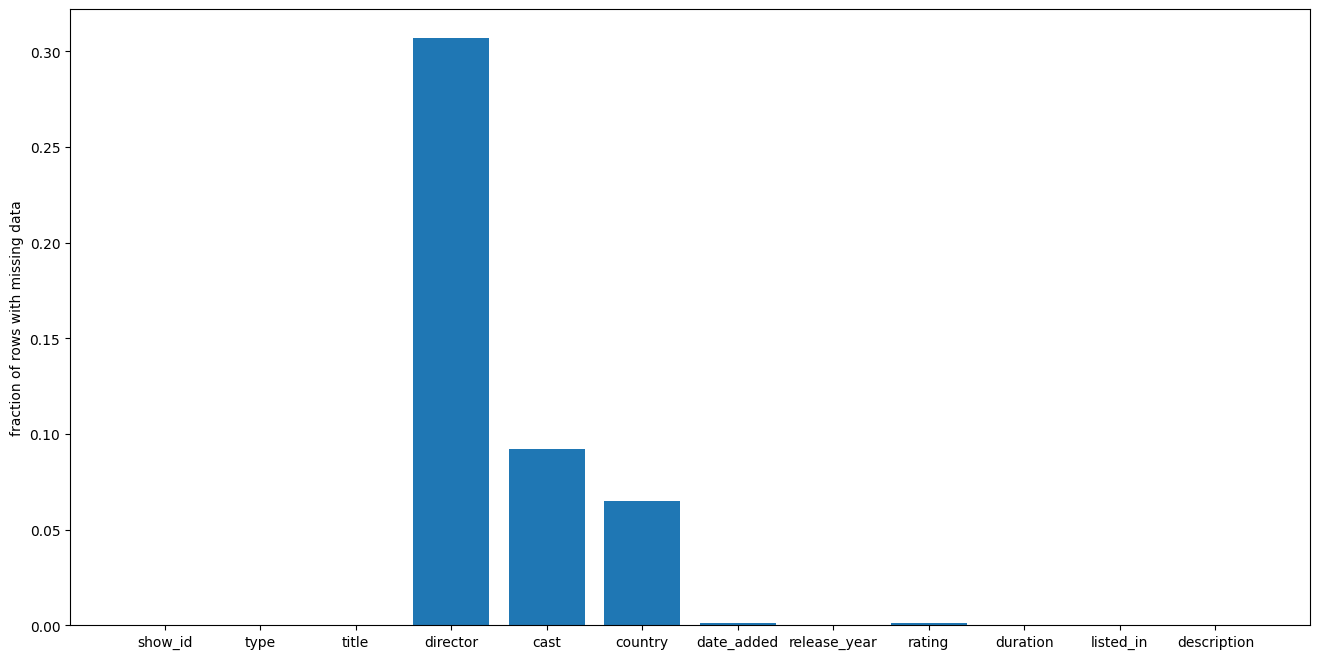

In [9]:
# null value distribution
null_counts = data.isnull().sum()/len(data)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts)),null_counts.index,rotation='horizontal')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

<Axes: >

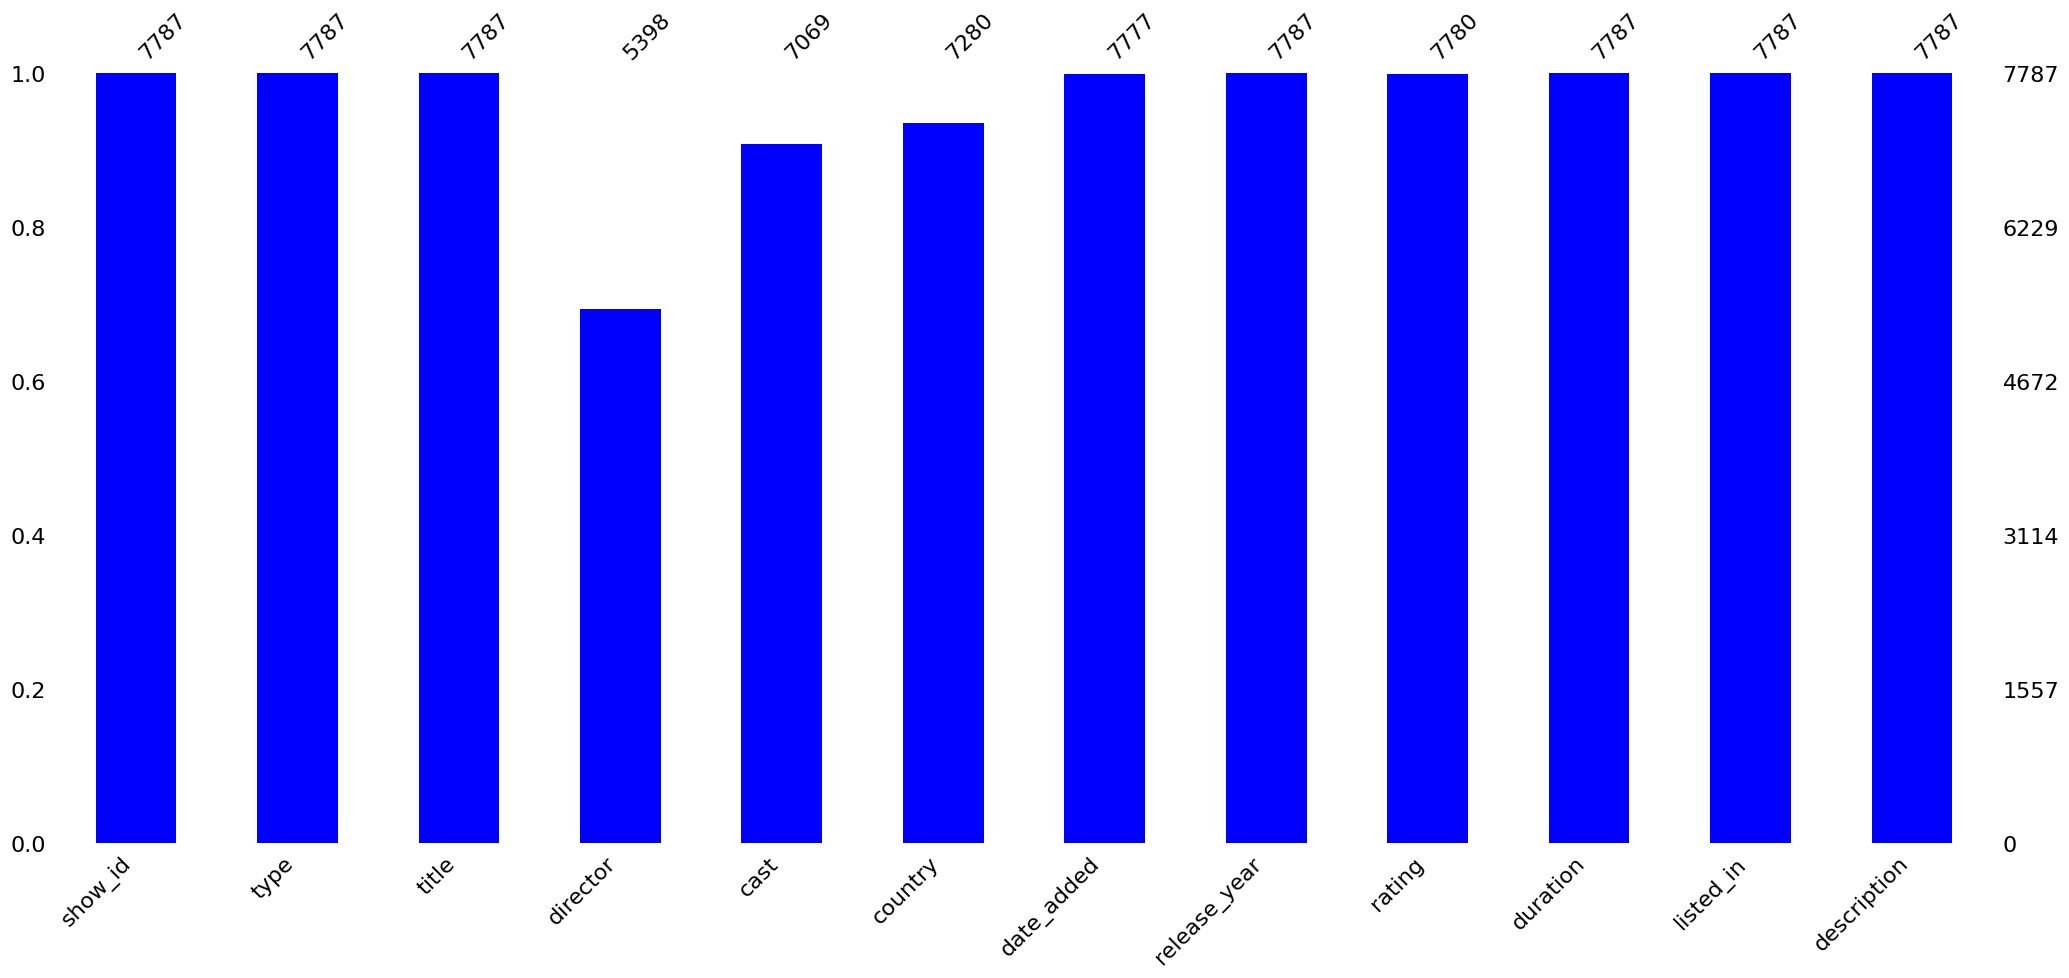

In [10]:
# Visualizing the missing values
import missingno as msno
msno.bar(data, color = 'blue')

### What did you know about your dataset?

As we can check most of the columns are not having any missing of null value except
- Director (2389)
- Cast (718)
- Country (507)
- Date_added (10)
- Rating (7)

##  ***3. Understanding Our Variables👇🏻***

In [11]:
# Dataset Columns
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:



#Looking for the description of the dataset to get insights of the data
data.describe(include='all')


show_id   type title                director                cast  \
count     7787   7787  7787                    5398                7069   
unique    7787      2  7787                    4049                6831   
top         s1  Movie    3%  Raúl Campos, Jan Suter  David Attenborough   
freq         1   5377     1                      18                  18   
mean       NaN    NaN   NaN                     NaN                 NaN   
std        NaN    NaN   NaN                     NaN                 NaN   
min        NaN    NaN   NaN                     NaN                 NaN   
25%        NaN    NaN   NaN                     NaN                 NaN   
50%        NaN    NaN   NaN                     NaN                 NaN   
75%        NaN    NaN   NaN                     NaN                 NaN   
max        NaN    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            7280             7777   7787.000000   7780      7787   
unique            681             1565           NaN     14       216   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2555              118           NaN   2863      1608   
mean              NaN              NaN   2013.932580    NaN       NaN   
std               NaN              NaN      8.757395    NaN       NaN   
min               NaN              NaN   1925.000000    NaN       NaN   
25%               NaN              NaN   2013.000000    NaN       NaN   
50%               NaN              NaN   2017.000000    NaN       NaN   
75%               NaN              NaN   2018.000000    NaN       NaN   
max               NaN              NaN   2021.000000    NaN       NaN   

            listed_in                                        description  
count            7787                                               7787  
unique            492                                               7769  
top     Documentaries  Multiple women report their husbands as missin...  
freq              334                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

### Variables Description 👇🏻

Only one column Release_Date is numerical type, rest all are strings. So, Describe is not very useful in this case.

### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.
for i in data.columns:
  print(f'number of unique values in {i} column : {data[i].nunique()}    \nunique values :\n{data[i].unique()}')
  print('='*150)

number of unique values in show_id column : 7787    
unique values :
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
number of unique values in type column : 2    
unique values :
['TV Show' 'Movie']
number of unique values in title column : 7787    
unique values :
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
number of unique values in director column : 4049    
unique values :
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
number of unique values in cast column : 6831    
unique values :
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sa

- **After analysing dataset we are more focusing toward 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description' columns and these column carry a lots of information.**
- **We are building our model on the top of mentioned features where those feature are used to create one cluster column to implement K-means, Hierarchical clustering and building content based recommandation system as well.**

## **4. EDA**


Exploratory Data Analysis (EDA) is the very first step before you can perform any changes to the dataset or develop a statistical model to answer business problems. In other words, the process of EDA contains summarizing, visualizing and getting deeply acquainted with the important traits of a data set.

#### Chart - 1

<Axes: xlabel='type', ylabel='count'>

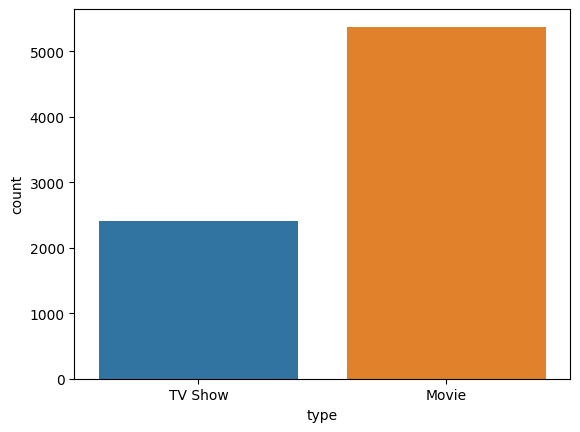

In [14]:
# Chart - 1 visualization code
sns.countplot(x ='type', data = data)

##### 1. Why did you pick the specific chart?


There are only two types namely TV shows and Movies, so we want to check which are greater in number.

##### 2. What is/are the insight(s) found from the chart?

There are more obervations of Movies than TV shows in our dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Based on this insight, Netflix could potentially make informed decisions about the types of content to prioritize in its programming and marketing efforts. For example, if the data suggests that subscribers are more interested in movies than TV shows, Netflix could allocate more resources towards acquiring or producing movie content, or promoting existing movie content to increase engagement and retention.

#### Chart - 2

In [15]:
df_pie = data.groupby(['rating'])['show_id'].count().reset_index()

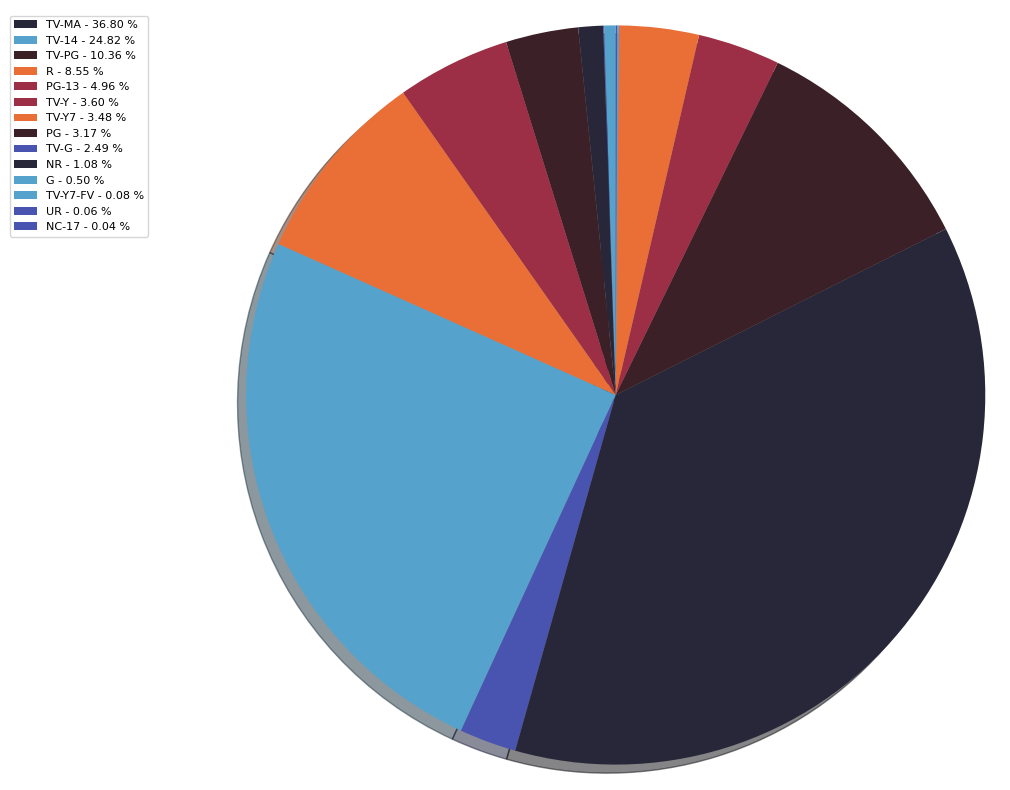

In [16]:
x = np.char.array(list(df_pie['rating'].values))
y = np.array(df_pie['show_id'].values)
colors = sns.color_palette('icefire')[0:14]
porcent = 100.*y/y.sum()
plt.figure(figsize = (10, 10))
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2, shadow= True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

##### 1. Why did you pick the specific chart?

Rating is an important aspect for any content based platform and we want to analyse the different types of rating and the extent of content it has.


##### 2. What is/are the insight(s) found from the chart?

* The majority of the rated content on Netflix falls into the TV-MA and TV-14 categories.
* The high share of TV-MA and TV-14 rated content suggests that there is a significant audience for mature and teen-oriented content.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* This data can be used by advertisers to target their ads more effectively to the desired audience. Since different ratings may have different demographics, advertisers can use this data to plan and target their campaigns more accurately.

#### Chart - 3

In [18]:
# Chart - 3 - creating dataframe
df_release_year = data.groupby(['release_year','type'])['show_id'].count().reset_index()
df_release_year

release_year     type  show_id
0            1925  TV Show        1
1            1942    Movie        2
2            1943    Movie        3
3            1944    Movie        3
4            1945    Movie        3
..            ...      ...      ...
113          2019  TV Show      414
114          2020    Movie      411
115          2020  TV Show      457
116          2021    Movie       12
117          2021  TV Show       19

[118 rows x 3 columns]

<Axes: xlabel='release_year', ylabel='show_id'>

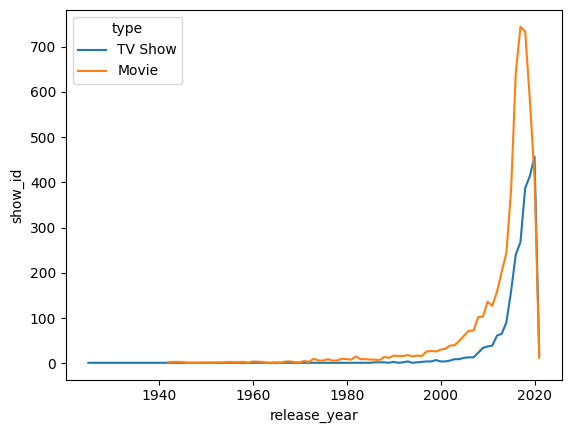

In [19]:
# creating Visualisation
sns.lineplot(data = df_release_year, x= 'release_year', y = 'show_id', hue = 'type')

##### 1. Why did you pick the specific chart?

We used this plot to check the distribution of TV shows and movies across years. Line plots are a useful tool for analyzing trends and patterns over time, especially when dealing with data across different years.

##### 2. What is/are the insight(s) found from the chart?

*  The insight that can be drawn is that the number of TV shows and movies on Netflix has increased significantly since 2010.
* The significant increase in the number of TV shows and movies on Netflix since 2010 could reflect the evolution of the streaming industry. As more consumers have shifted away from traditional cable and satellite TV, the demand for on-demand streaming services has increased. Netflix has responded to this trend by investing in its content library and expanding its offerings to attract more subscribers.
* Netflix is known for its data-driven decision-making approach, and the increase in the number of TV shows and movies on its platform could reflect the company's use of data to identify consumer preferences and trends.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By understanding audience preferences and trends, Netflix can continue to build a content library that meets the needs and preferences of its subscribers. This could help improve the overall customer experience and increase customer satisfaction, which could in turn lead to higher retention rates and increased revenue.

* By building a robust and diverse content library, Netflix can establish a competitive advantage over its rivals in the streaming industry. This can help attract more subscribers and increase market share, which could contribute to the overall success of the business.

#### Chart - 4

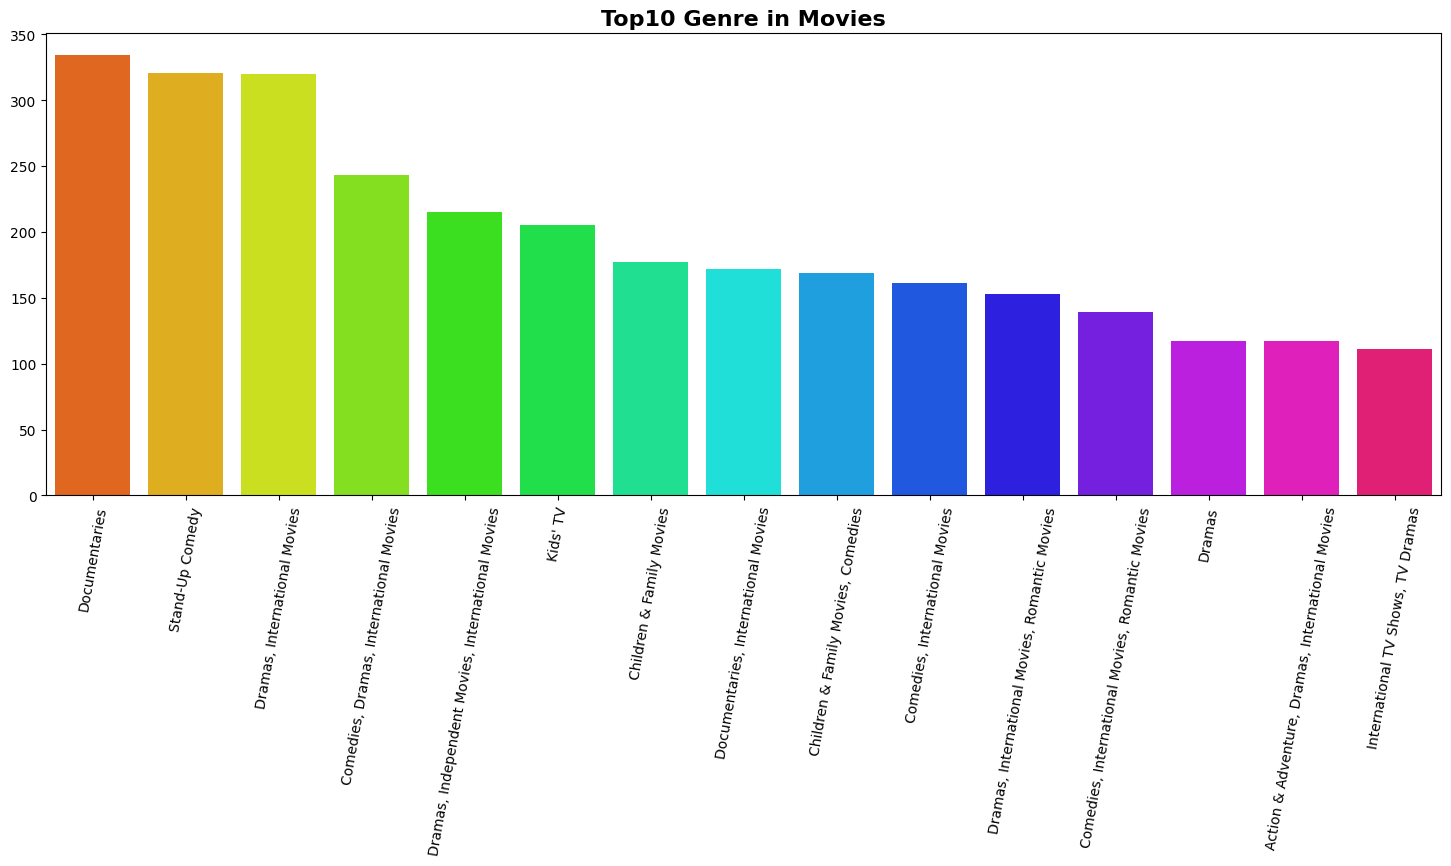

In [20]:
# Top 10 Genre in movies
plt.figure(figsize=(18,6))
sns.barplot(x = data["listed_in"].value_counts().head(15).index,
            y = data["listed_in"].value_counts().head(15).values,palette="hsv")
plt.xticks(rotation=80)
plt.title("Top10 Genre in Movies",size='16',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

Bar plots are used to visualize and compare categorical data. We used bar plot to plot the average count of all the genres in our dataset.


##### 2. What is/are the insight(s) found from the chart?

Documentaries, Stand-up Comedy, Drama, International movies and comedies are some of the highly popular content on the platform. the reason being people use ott platforms as the source of entertainment and they often love the content that is more relatable to their life and feel real.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could help Netflix make informed decisions about its content acquisition and production strategies. By understanding the popularity of different genres among its subscribers, Netflix can build a more diverse and appealing content library that meets the needs and preferences of its audience. This could help drive subscriber growth, increase engagement, and establish a competitive advantage in the streaming industry.

#### Chart - 5

In [21]:
df_duration = data.groupby(['duration'])['show_id'].count().sort_values(ascending= False).reset_index()
df_duration


duration  show_id
0     1 Season     1608
1    2 Seasons      382
2    3 Seasons      184
3       90 min      136
4       93 min      131
..         ...      ...
211    196 min        1
212    194 min        1
213    193 min        1
214     43 min        1
215    204 min        1

[216 rows x 2 columns]

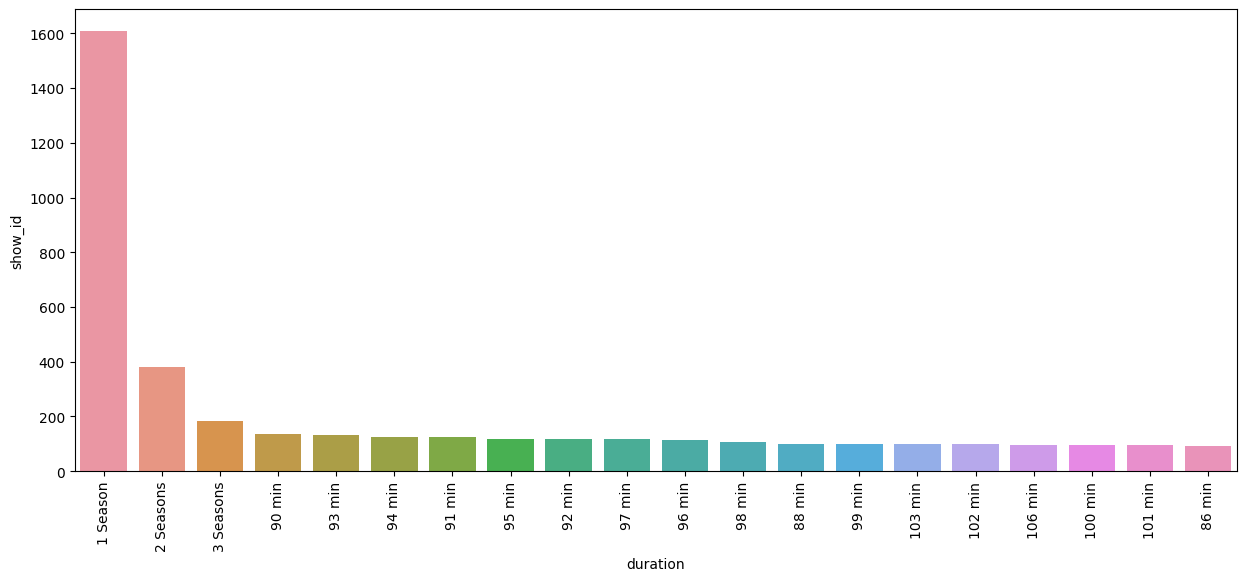

In [22]:
# Chart - 5 visualization code
plt.figure(figsize = (15, 6))
sns.barplot(data = df_duration, x = df_duration['duration'][:20], y = df_duration['show_id'])
plt.xticks(rotation = 90)
plt.show()

##### 1. Why did you pick the specific chart?




Bar plot here is used to plot the duration vs show-id count

##### 2. What is/are the insight(s) found from the chart?

* We can see that the maximum number of content in our data is related to Season 1, where the TV shows, movies or webseries made on the platform have atleast 1 season length.
* The fact that "Season 1" is the most frequent duration for TV shows on Netflix suggests that the streaming service typically organizes its original programming into seasons, rather than releasing episodes one-by-one or in smaller batches.
* The fact that "Season 1" is the most frequent duration for TV shows on Netflix could suggest that viewers are most likely to watch new shows when they are first released, rather than waiting for subsequent seasons to be released. This could be due to the marketing and promotion efforts that Netflix puts into new shows, or to the fact that viewers are more likely to be interested in a show when it is first released.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could be helpful in guiding Netflix's content acquisition and production strategies. By understanding the duration preferences of viewers, Netflix can make informed decisions about how to structure and release its original content, and how to allocate resources to produce content that resonates with its audience.

#### Chart - 6

In [23]:
# Chart - 6 visualization code
df_country = data.groupby(['country', 'type'])['show_id'].count().sort_values(ascending = False).reset_index()
df_country

country     type  show_id
0                                        United States    Movie     1850
1                                                India    Movie      852
2                                        United States  TV Show      705
3                                       United Kingdom  TV Show      204
4                                       United Kingdom    Movie      193
..                                                 ...      ...      ...
768                           Indonesia, United States    Movie        1
769                                       Iran, France    Movie        1
770                                    Ireland, Canada    Movie        1
771  Ireland, Canada, Luxembourg, United States, Un...    Movie        1
772                                           Zimbabwe    Movie        1

[773 rows x 3 columns]

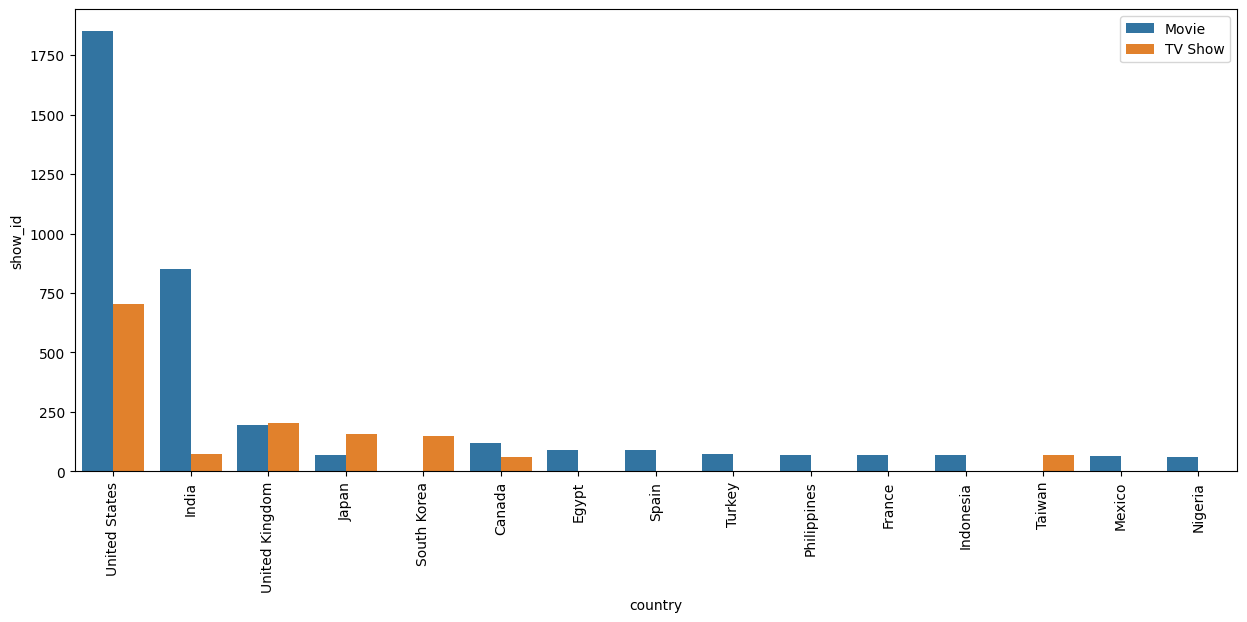

In [24]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df_country, x = df_country['country'][:20], y = df_country['show_id'], hue = 'type')
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')
plt.show()

##### 1. Why did you pick the specific chart?

Here we are doing Bivariate analysis using bar plot to compare the number of movies and TV shows produced by different countries. Bivariate analysis bar plots are used to compare the relationship between two categorical variables.

##### 2. What is/are the insight(s) found from the chart?

USA and India are topmost countries in producing content over the platform.

* As both the USA and India have very distinct cultural identities, the high production volume of movies and TV shows from these countries could indicate that their culture and values are widely consumed and popular among audiences worldwide.
* The fact that USA and India are the top producers of movies and TV shows could indicate that these markets are more attractive for investment in the industry.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The dominance of the USA and India in the movie and TV show production industry is an important insight for the industry as it can help inform business decisions related to production, distribution, and marketing.

#### Chart - 7

<Figure size 1400x800 with 0 Axes>

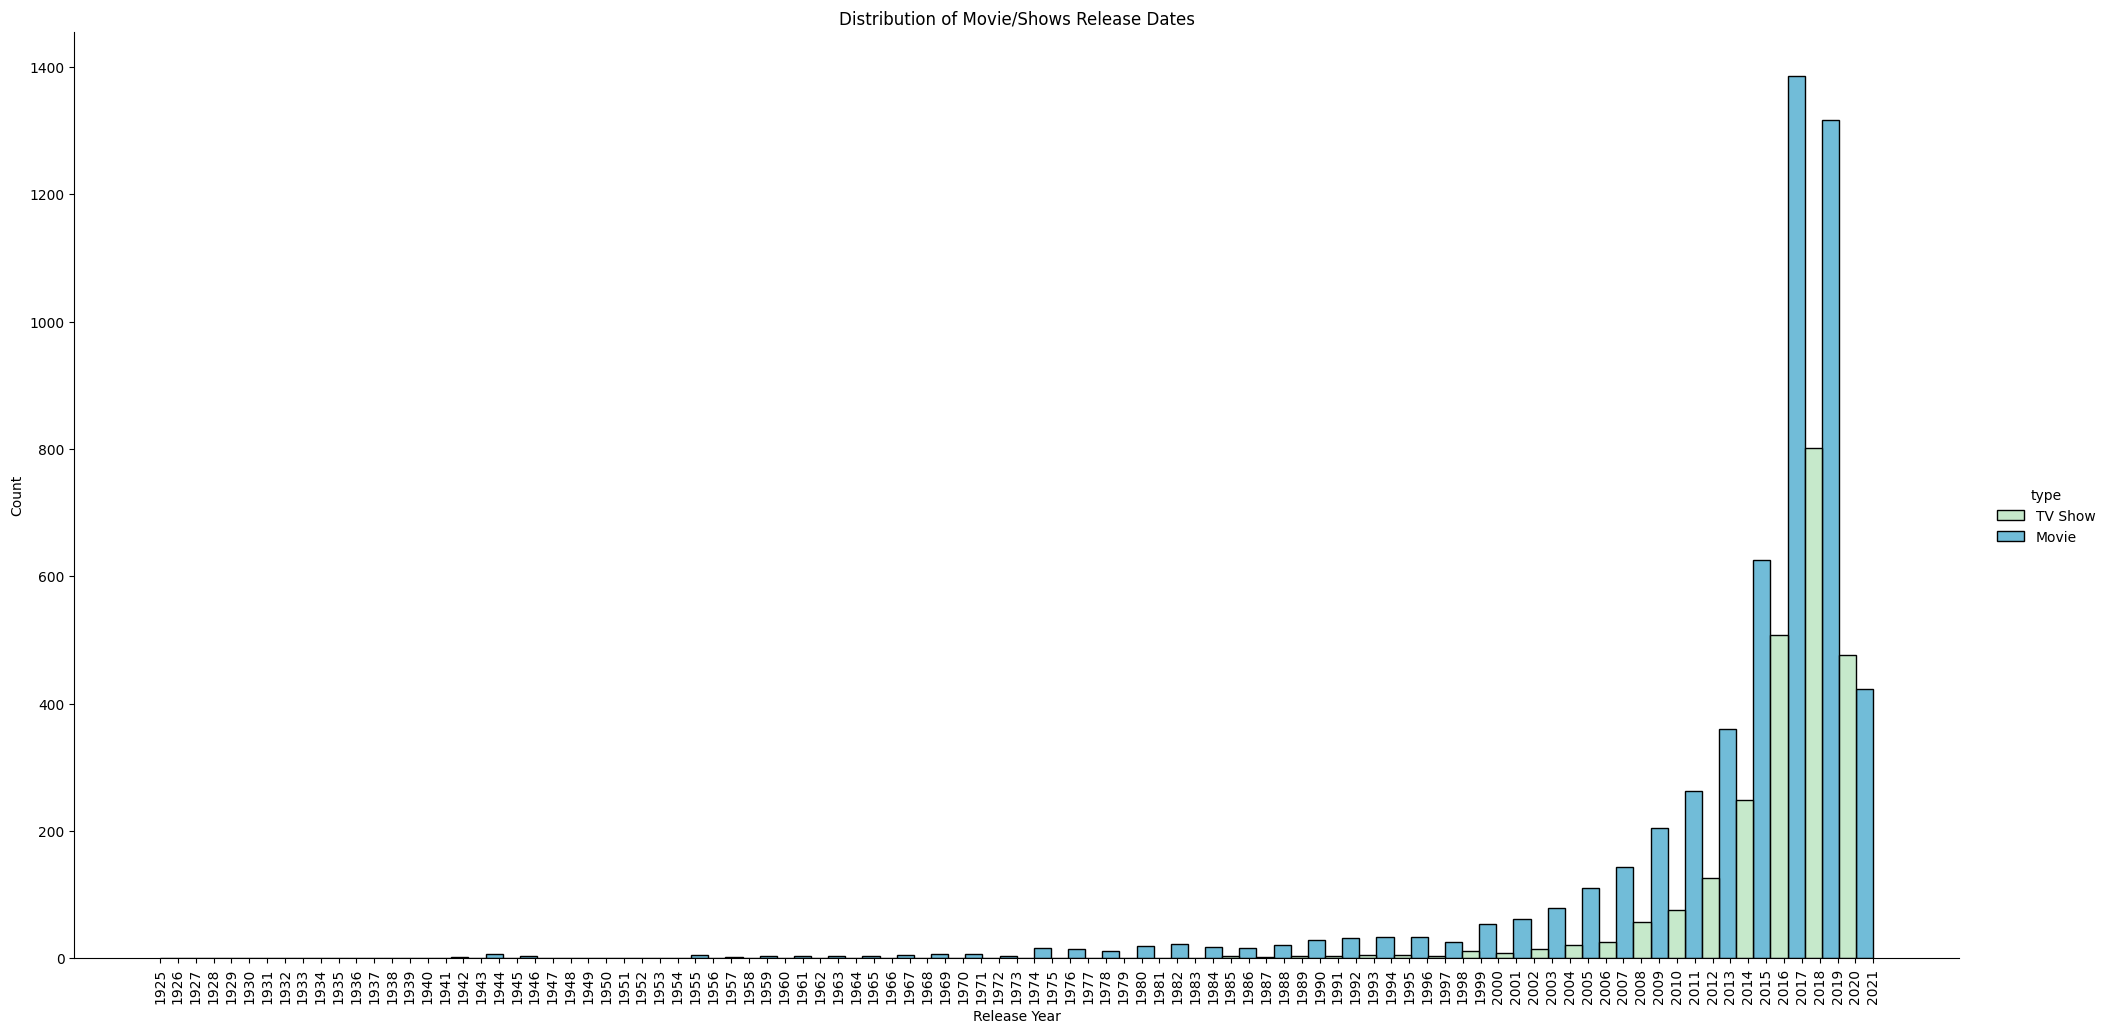

In [25]:
a = plt.figure(figsize=(14,8))
a = sns.displot(x='release_year', hue = 'type', data = data, kind = 'hist', height=10, aspect=2, bins = 50, multiple='dodge', palette='GnBu')
a = plt.xticks(ticks= np.arange(data.release_year.min(),data.release_year.max()+1,1), rotation = 90)
a = plt.title('Distribution of Movie/Shows Release Dates')
a = plt.xlabel('Release Year')


##### 1. Why did you pick the specific chart?

We picked histogram to visualize the concentration of movie and TV show releases over time, showing when the number of releases began to increase and decrease.

##### 2. What is/are the insight(s) found from the chart?

* There is rapid increase in content over the platform after 2010.
* In 2017, the maximum number of movies were released while in 2018 the maximum number of TV shows were released.
* Between 2017-2019, the maximum content is released or added to the platform.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights could be useful for understanding the growth trajectory of Netflix and for making informed decisions related to content strategy and marketing efforts.


#### Chart - 8

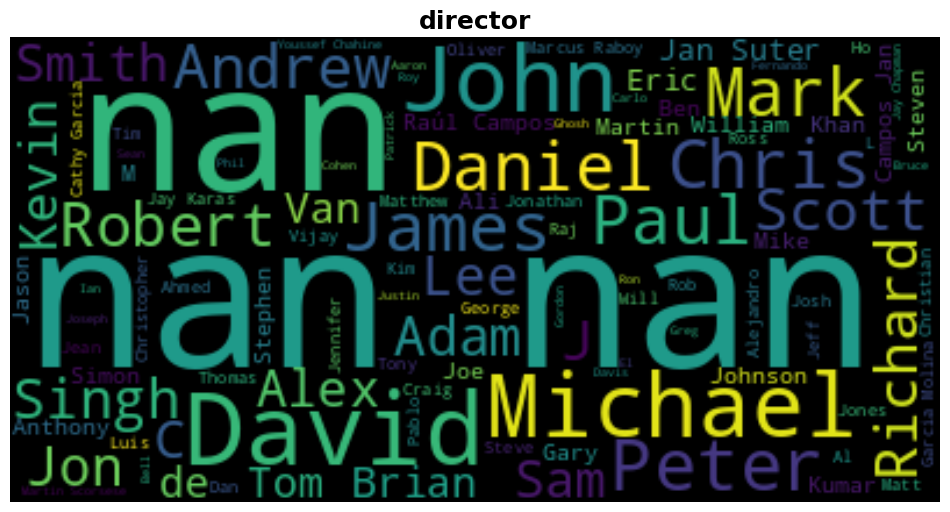

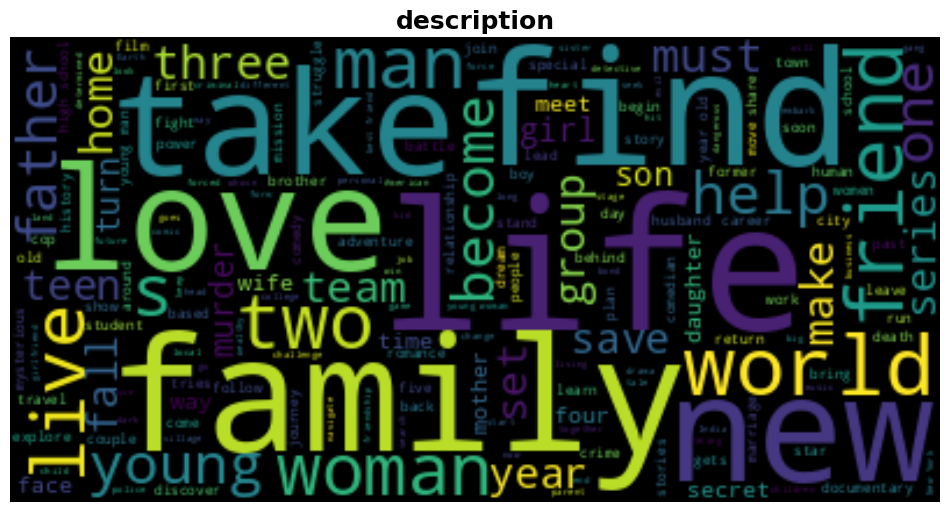

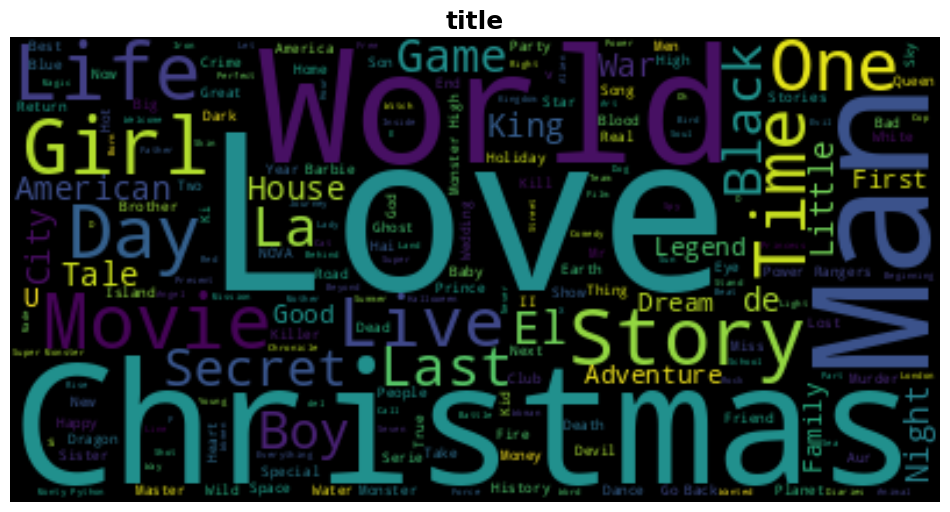

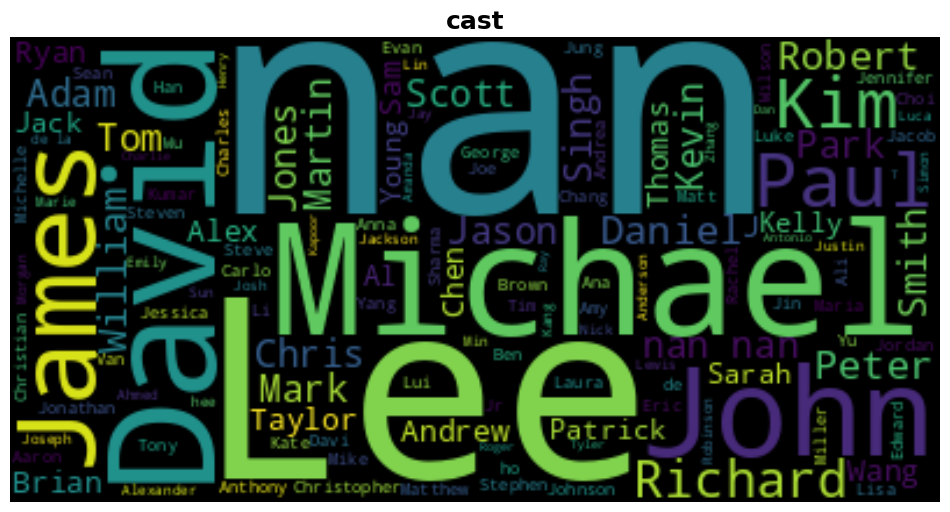

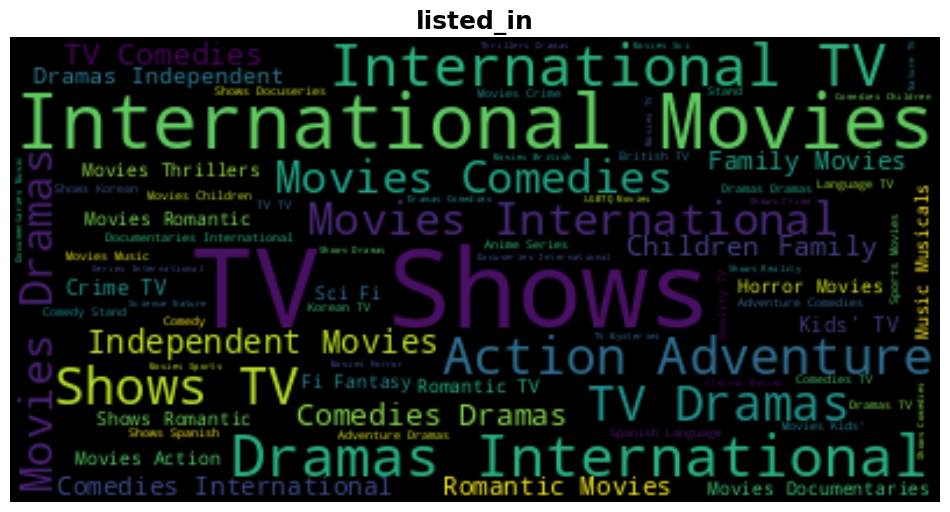

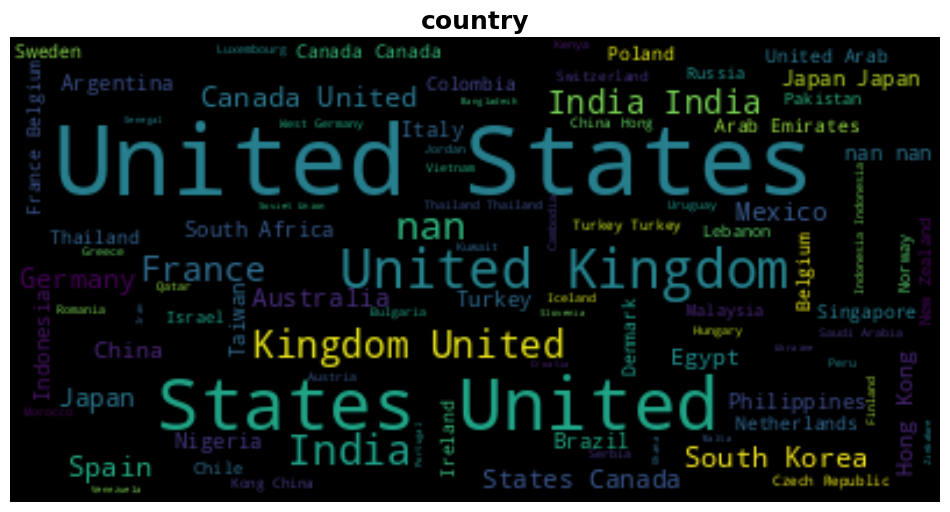

In [27]:
# Chart - 8 visualization code
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

features_for_wordplot = ['director', 'description', 'title', 'cast', 'listed_in', 'country']

for i in features_for_wordplot:
    df_word_cloud = data[i]

    # Convert elements to strings if they are not already
    text = " ".join(str(word) for word in df_word_cloud)

    # Create stopword list:
    stopwords = set(STOPWORDS)

    # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

    # Display the generated image:
    plt.figure(figsize=(12, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(i, fontsize=18, fontweight='bold')
    plt.show()

##### 1. Why did you pick the specific chart?

We used a word cloud plot to visualize the most frequently occurring words or terms in a given text or dataset. Word clouds are often used to provide a quick and intuitive visualization of the most important or relevant words, which can help identify key themes, topics, or patterns in the data.

##### 2. What is/are the insight(s) found from the chart?

* In director, the most frequent director names are -: David, Michael, Johns, Daniel, Paul
* In description, the most frequently used words are-: find, love, life, live, man, woman, battle, help, friend etc. which suggests that movies often center around themes of relationships, personal growth, and overcoming obstacles.
* In cast, the most frequent actor names are-: Michael, James, David, John, Paul etc.
* In listed_in, the most frequent genres are-: international movies, dramas, action, adventure, international movies etc.
* In country, most frequent names are-: US, India, UK, Japan, Germany, Cannada etc.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

*  Netflix could use this information to tailor its content recommendations to users based on their location, genre preferences, and popular actors/directors. By understanding what types of movies are most popular in which countries, Netflix could produce more localized content and expand its subscriber base.

* Additionally, by identifying the most frequent keywords used in movie descriptions, Netflix could optimize its search algorithm to return more accurate results, and also use this information to craft more compelling movie synopses to entice users to watch.

* Overall, the insights gained from analyzing the Netflix dataset by the above word plot could be leveraged by Netflix to make better business decisions and provide a more personalized experience for its users, which could lead to increased subscriber satisfaction and revenue.

#### Chart - 9


In [28]:
#creating two new df's
tv_shows=data[data['type']=='TV Show']
movies=data[data['type']=='Movie']

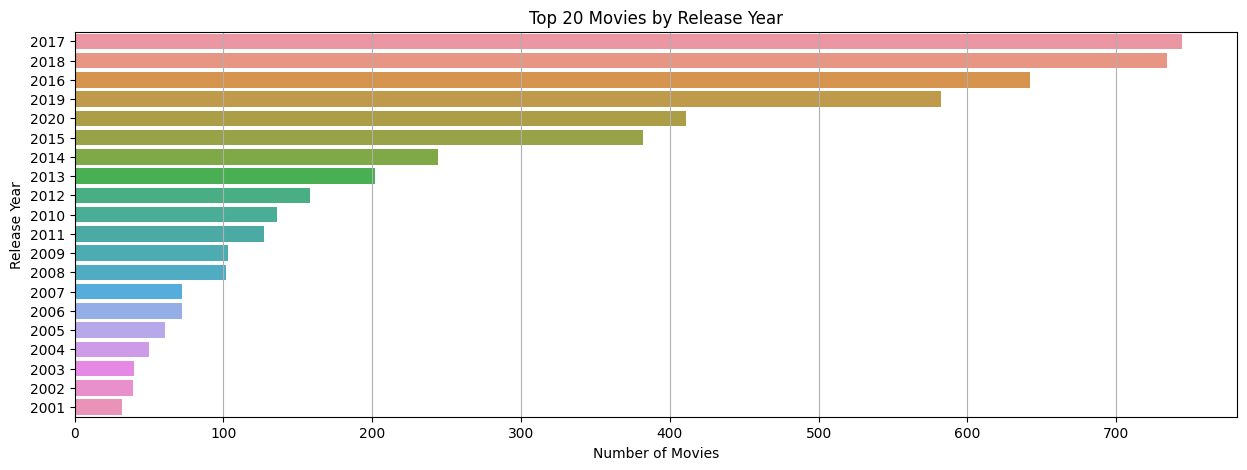

In [29]:
    # Chart - 9 visualization code
    plt.figure(figsize=(15,5))
    sns.set_palette('bright')
    sns.countplot(y=movies['release_year'],data=data,order=movies['release_year'].value_counts().index[0:20])
    plt.title('Top 20 Movies by Release Year')
    plt.xlabel('Number of Movies')
    plt.ylabel('Release Year')
    plt.grid(axis='x')

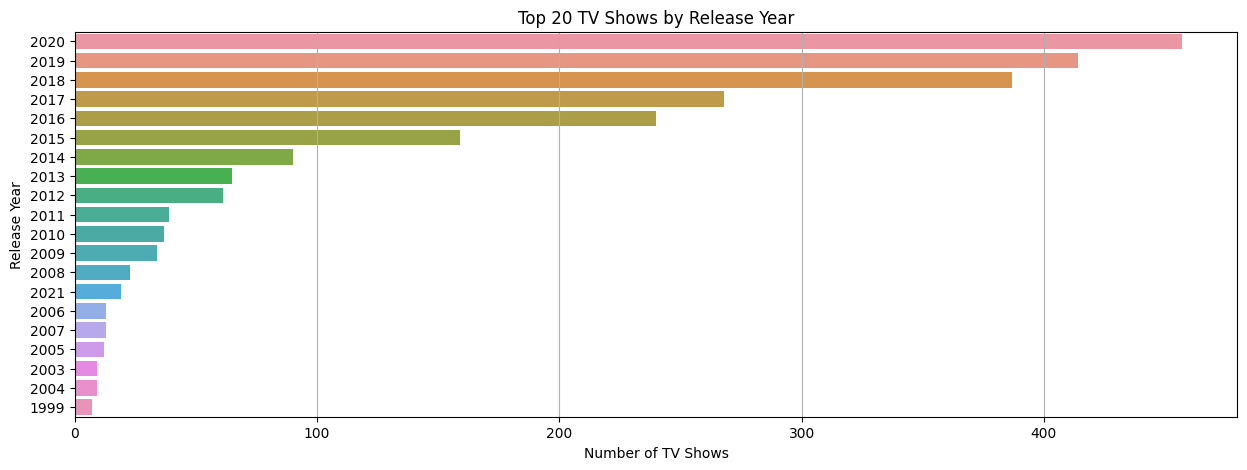

In [30]:
plt.figure(figsize=(15,5))
sns.set_palette('bright')
sns.countplot(y=tv_shows['release_year'],data=data,order=tv_shows['release_year'].value_counts().index[0:20])
plt.title('Top 20 TV Shows by Release Year')
plt.xlabel('Number of TV Shows')
plt.ylabel('Release Year')
plt.grid(axis='x')


##### 1. Why did you pick the specific chart?

We used this chart to plot the count of TV shows and movies differently.

##### 2. What is/are the insight(s) found from the chart?

* Maximum number of movies released or added is in the year 2018.
* Maximum number of TV shows released is in the year 2020, as it was covid time period and everyone is at their home, so netflix use this opportunity to give offers and quality content to the audiences that led to more release in movies and TV shows.
* We saw a huge increase in the number of movies and television episodes after 2014.

#### Chart - 10

In [31]:
# Chart - 10 visualization code
#adding columns of month and year of addition

data['month'] = pd.DatetimeIndex(data['date_added']).month
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  
0  In a future where the elite inhabit an island ...    8.0  
1  After a devastating earthquake hits Mexico Cit...   12.0  
2  When an army recruit is found dead, his fellow...   12.0  
3  In a postapocalyptic world, rag-doll robots hi...   11.0  
4  A brilliant group of students become card-coun...    1.0

<Axes: xlabel='month', ylabel='count'>

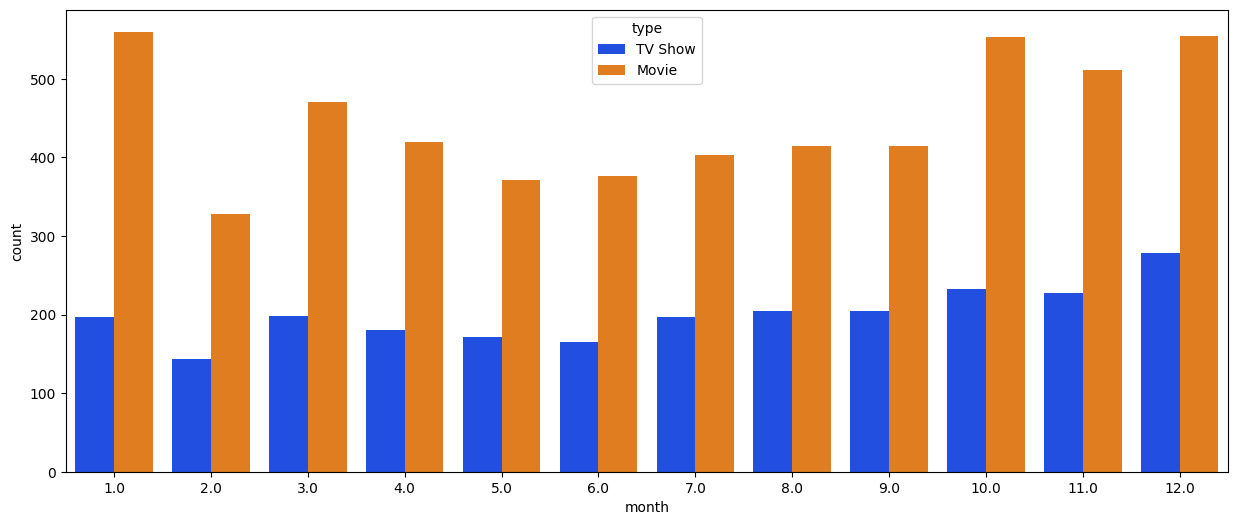

In [32]:
fig, ax = plt.subplots(figsize=(15,6)) #plt.subplots() is a function that returns a tuple containing a figure and axes object(s).
                                       #Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax

sns.countplot(x='month', hue='type',lw=5, data=data, ax=ax)

##### 1. Why did you pick the specific chart?

Countplot is used to Show the counts of observations in each categorical bin using bars. We used this specific chart to check the count of TV shows and movies over month.

##### 2. What is/are the insight(s) found from the chart?

Maximum number of content is released in the month of December followed by january.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be used to promote more targeted marketing strategies in specific months when the release is high. It can help drive more subsriptions to the platform and eventually more revenue.

#### Chart - 11

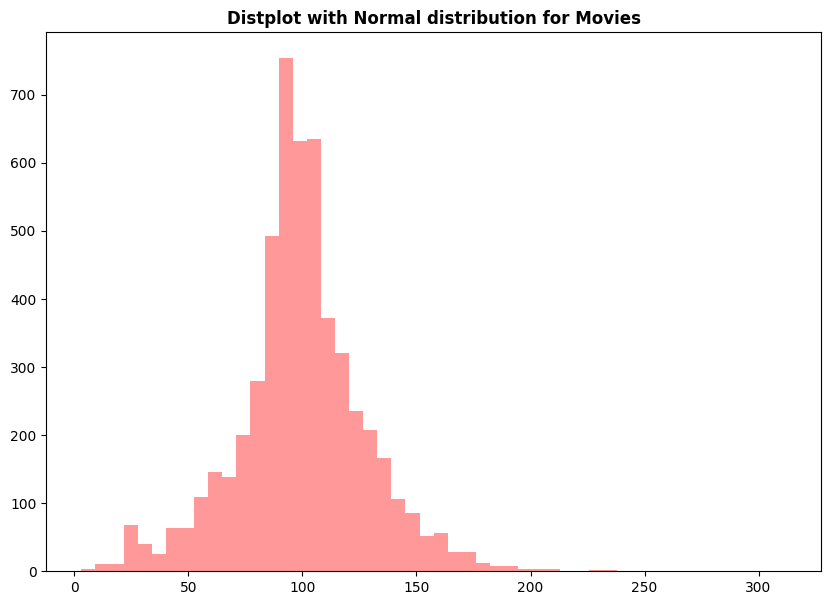

In [33]:
# Chart - 11 visualization code

#Checking the distribution of Movie Durations
plt.figure(figsize=(10,7))
sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

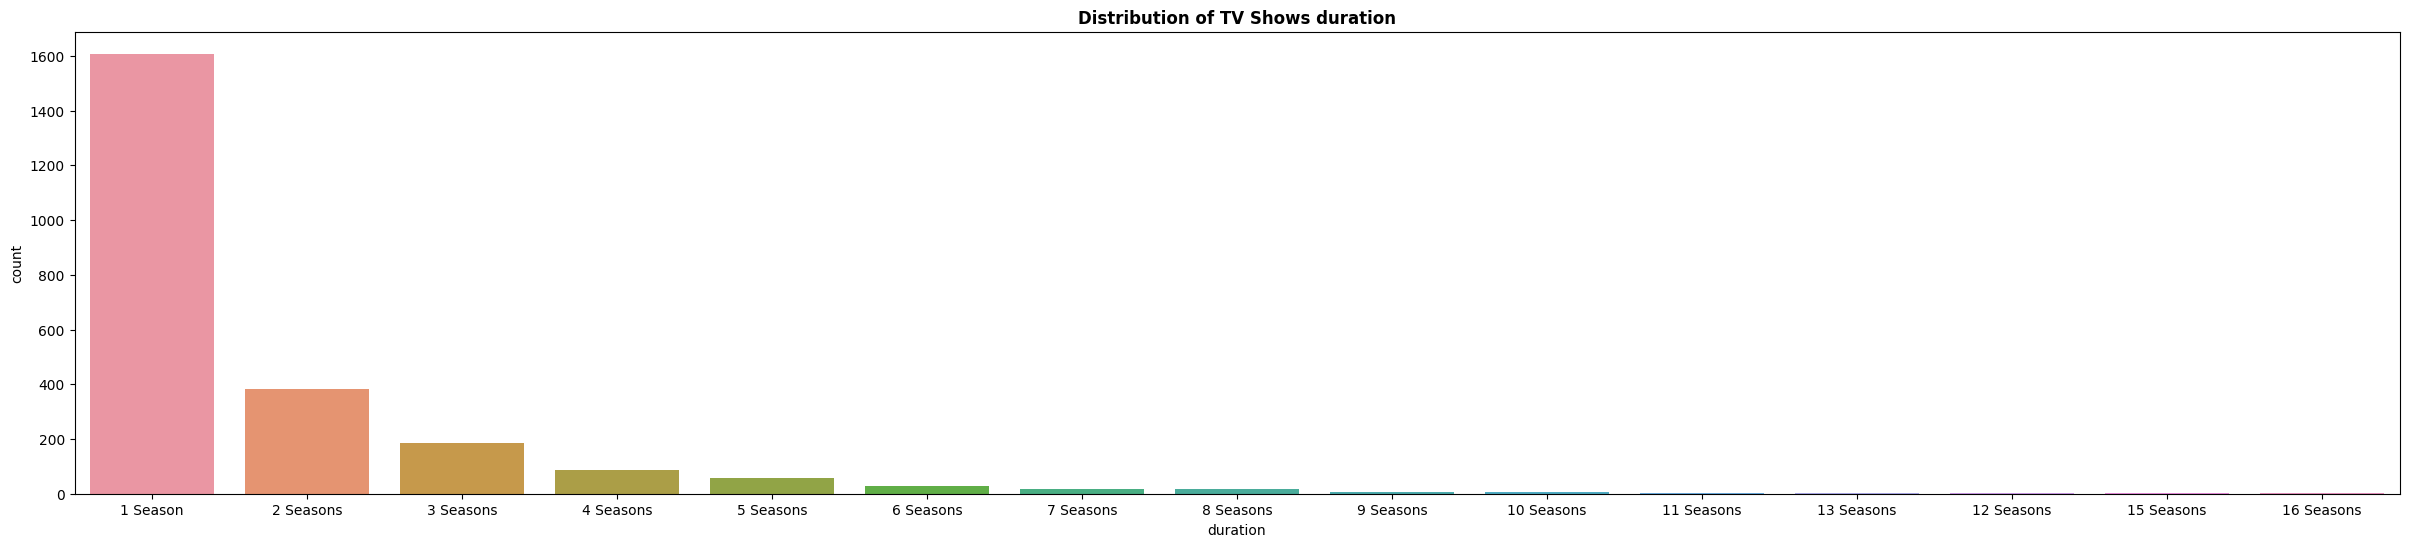

In [34]:
#Checking the distribution of TV SHOWS
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)

##### 1. Why did you pick the specific chart?

To check the distribution of duration feature for movies, and TV shows.

##### 2. What is/are the insight(s) found from the chart?

The variable named duration follow a distribution which is close to normal distribution, while there is highly skewed distribution for TV shows

#### Chart - 12

In [35]:
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                                NaN 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  month  year_added  
0     In a future where the elite inhabit an island ...    8.0      2020.0  
1     After a devastating earthquake hits Mexico Cit...   12.0      2016.0  
2     When an

In [36]:
# All the movies and TV shows in different dataframe
movies = data[data['type']=='Movie']
tv_shows= data[data['type']=='TV Show']

([<matplotlib.patches.Wedge at 0x799b397c6830>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

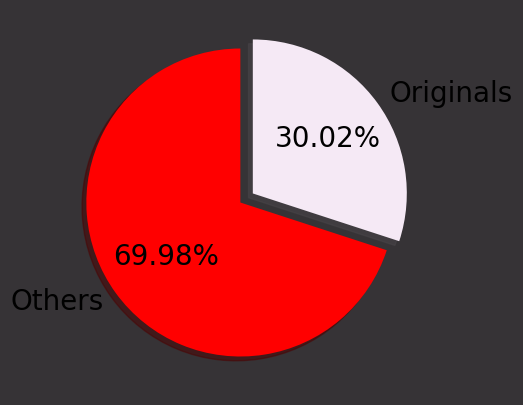

In [37]:
movies['originals'] = np.where(movies['release_year']==movies['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)        #This will make the "Originals" slice of the pie chart stand out a bit from the "Others" slice.
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])
     #The autopct parameter specifies that the percentage values should be displayed with 2 decimal places.

##### 1. Why did you pick the specific chart?

We used pie chart, with specifying several parameters to plot the difference between Netflix's original content and other content on the platform.

##### 2. What is/are the insight(s) found from the chart?

Netflix has over 30% original content which shows that netflix invests heavily in creating and promoting their own original content. This can be seen as part of Netflix's strategy to differentiate themselves from other streaming platforms and to maintain a competitive advantage.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* By better understanding the popularity of original content versus other content on the platform, Netflix may be able to more effectively allocate its marketing budget to promote the most popular content, which can improve the overall performance of the platform and help maintain its subscriber base.

* By promoting their original content, Netflix can also build their brand recognition and reputation as a provider of high-quality and innovative content.

* By understanding the popularity of original content on the platform can help Netflix make more informed decisions about content acquisition and retention, marketing, and brand management, which can ultimately lead to a positive business impact for the company.

#### Chart - 13 - Correlation Heatmap

In [38]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  month  year_added  
0  In a future where the elite inhabit an island ...    8.0      2020.0  
1  After a devastating earthquake hits Mexico Cit...   12.0      2016.0  
2  When an army recruit is found dead, his fellow...   12.0      2018.0  
3  In a postapocalyptic world, rag-doll robots hi...   11.0      2017.0  
4  A brilliant group of students become card-coun...    1.0      2020.0

In [39]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)


In [40]:
# Preparing data for heatmap
data['count'] = 1
df = data.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
df = df['country']

df_heatmap = data.loc[data['country'].isin(df)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Adults       0.446328  0.277228  0.678261  0.255688  0.364444    0.77   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.355556    0.14   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Adults          0.469945  0.835821        0.513854       0.501959  
Kids            0.027322  0.022388        0.093199       0.073276  
Older Kids      0.120219  0.044776        0.204030       0.187696  
Teens           0.382514  0.097015        0.188917       0.237069

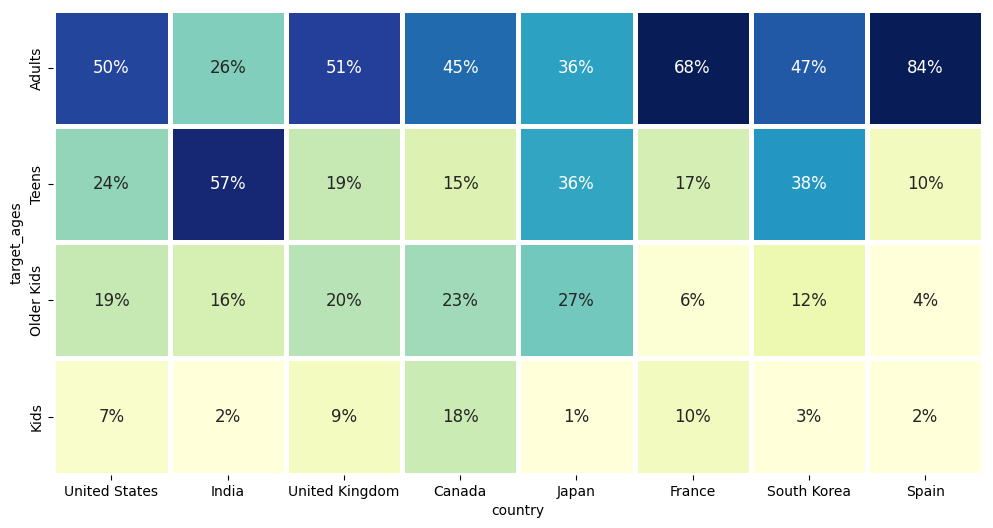

In [41]:
# Chart - 13 visualization code

# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

plt.show()

##### 1. Why did you pick the specific chart?

To  visualize the distribution of the target_ages column across the top 10 countries with the most content on Netflix.

##### 2. What is/are the insight(s) found from the chart?

US and UK are closely aligned with their Netflix target ages, means that people in both USA and UK prefer to watch similar type of content.

In similar way US and Canada are also highly aligned with their Netflix target ages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By looking at this heatmap, we can gain insights into how the content preferences of viewers in different countries may differ based on their age group, which can help inform content acquisition and localization strategies for Netflix.

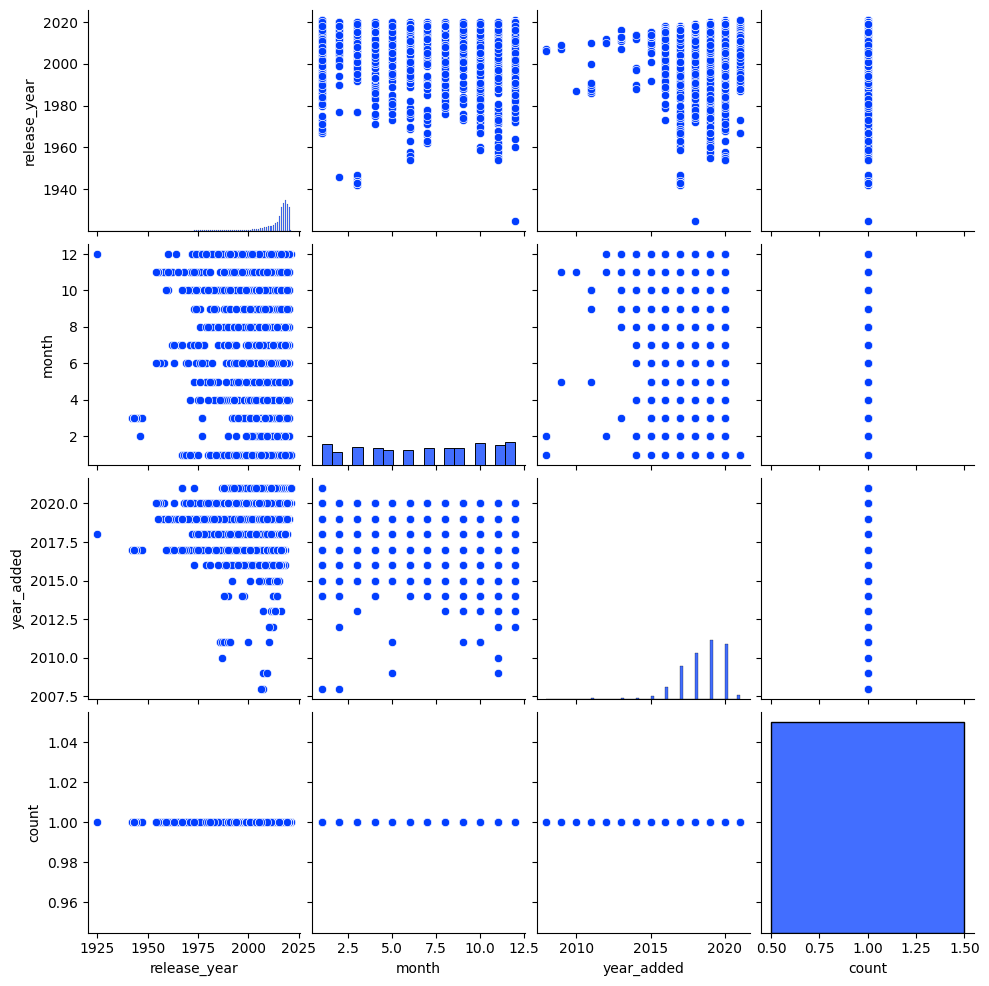

In [42]:
#PAIRPLOT
sns.pairplot(data)

## **Feature Engineering & Data Pre-processing**